# Explore data in Iceberg

In [1]:
import duckdb

%config SqlMagic.feedback = True
%config SqlMagic.displaycon = True

In [2]:
conn = duckdb.connect()
%load_ext sql
%sql conn --alias duckdb

The 'toml' package isn't installed. To load settings from pyproject.toml or ~/.jupysql/config, install with: pip install toml

In [3]:
%%sql duckdb
INSTALL iceberg;
LOAD iceberg;
UPDATE EXTENSIONS;

ATTACH 'warehouse' AS icecat (TYPE ICEBERG, ENDPOINT 'http://localhost:8181', AUTHORIZATION_TYPE 'none');
USE icecat.default;

# PRAGMA unsafe_enable_version_guessing=1;

Success


In [19]:
conn.execute("INSTALL iceberg; LOAD iceberg;")
conn.execute("UPDATE EXTENSIONS;")
conn.execute("ATTACH 'warehouse' AS icecat (TYPE ICEBERG, ENDPOINT 'http://localhost:8181', AUTHORIZATION_TYPE 'none');")
conn.execute("USE icecat.default;")

conn.execute("PRAGMA unsafe_enable_version_guessing=1;")

In [6]:
%%sql duckdb
SELECT
    *
FROM icecat.default.raw_events
LIMIT 5

id,user_id,amount,vendor_id,event_timestamp
258107923880,90,25.55,830,2025-08-29 21:04:33-07:00
258107923888,24,33.58,943,2025-08-30 02:02:38-07:00
258107923933,97,16.36,410,2025-08-29 20:11:35-07:00
258107923941,81,28.62,489,2025-08-30 15:53:40-07:00
258107923942,83,5.80,554,2025-08-29 21:46:46-07:00


In [5]:
%%sql
SELECT * FROM iceberg_snapshots('icecat.default.raw_events');

Running query in 'duckdb'

sequence_number,snapshot_id,timestamp_ms,manifest_list
2,757714982550219609,2025-09-02 02:24:00.041000,file:///tmp/warehouse/default/raw_events/metadata/snap-757714982550219609-0-f9003552-9e44-40cb-b3b8-7f813b236efe.avro
1,1169516159707921352,2025-09-02 02:22:47.427000,file:///tmp/warehouse/default/raw_events/metadata/snap-1169516159707921352-0-72953288-f8a9-45c0-bcc7-2d51bdefd686.avro


In [11]:
%%sql duckdb
SELECT 
    *
FROM iceberg_metadata('icecat.default.raw_events')

manifest_path,manifest_sequence_number,manifest_content,status,content,file_path,file_format,record_count
file:///tmp/warehouse/default/raw_events/metadata/f9003552-9e44-40cb-b3b8-7f813b236efe-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-30/00000-0-f9003552-9e44-40cb-b3b8-7f813b236efe.parquet,PARQUET,63
file:///tmp/warehouse/default/raw_events/metadata/f9003552-9e44-40cb-b3b8-7f813b236efe-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-09-02/00000-1-f9003552-9e44-40cb-b3b8-7f813b236efe.parquet,PARQUET,69
file:///tmp/warehouse/default/raw_events/metadata/f9003552-9e44-40cb-b3b8-7f813b236efe-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-26/00000-2-f9003552-9e44-40cb-b3b8-7f813b236efe.parquet,PARQUET,77
file:///tmp/warehouse/default/raw_events/metadata/f9003552-9e44-40cb-b3b8-7f813b236efe-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-09-01/00000-3-f9003552-9e44-40cb-b3b8-7f813b236efe.parquet,PARQUET,76
file:///tmp/warehouse/default/raw_events/metadata/f9003552-9e44-40cb-b3b8-7f813b236efe-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-31/00000-4-f9003552-9e44-40cb-b3b8-7f813b236efe.parquet,PARQUET,71
file:///tmp/warehouse/default/raw_events/metadata/f9003552-9e44-40cb-b3b8-7f813b236efe-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-24/00000-5-f9003552-9e44-40cb-b3b8-7f813b236efe.parquet,PARQUET,79
file:///tmp/warehouse/default/raw_events/metadata/f9003552-9e44-40cb-b3b8-7f813b236efe-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-22/00000-6-f9003552-9e44-40cb-b3b8-7f813b236efe.parquet,PARQUET,85
file:///tmp/warehouse/default/raw_events/metadata/f9003552-9e44-40cb-b3b8-7f813b236efe-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-23/00000-7-f9003552-9e44-40cb-b3b8-7f813b236efe.parquet,PARQUET,57
file:///tmp/warehouse/default/raw_events/metadata/f9003552-9e44-40cb-b3b8-7f813b236efe-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-29/00000-8-f9003552-9e44-40cb-b3b8-7f813b236efe.parquet,PARQUET,67
file:///tmp/warehouse/default/raw_events/metadata/f9003552-9e44-40cb-b3b8-7f813b236efe-m0.avro,2,DATA,ADDED,EXISTING,file:///tmp/warehouse/default/raw_events/data/dt=2025-08-27/00000-9-f9003552-9e44-40cb-b3b8-7f813b236efe.parquet,PARQUET,68


In [7]:
%%sql duckdb
SELECT
    COUNT(*)
FROM icecat.default.raw_events

count_star()
2000


In [14]:
%%sql duckdb
-- Time travel!
SELECT
    COUNT(*)
FROM iceberg_scan("icecat.default.raw_events", snapshot_from_id=1169516159707921352)
LIMIT 5

count_star()
1000


In [15]:
%%sql --save raw_events --no-execute
SELECT
    *
FROM icecat.default.raw_events

Running query in 'duckdb'

Skipping execution...

<Axes: title={'center': "'amount' from 'raw_events'"}, ylabel='amount'>

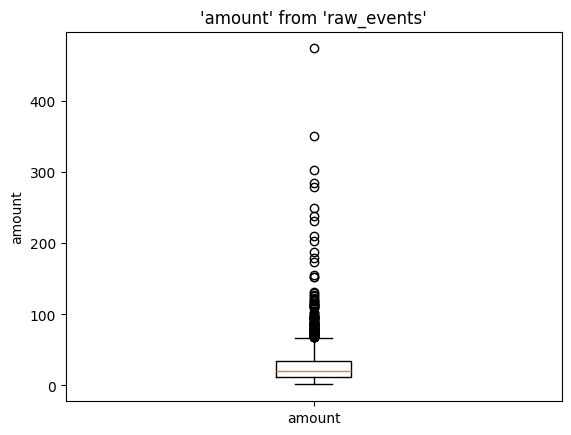

In [16]:
%sqlplot boxplot --table raw_events --column amount

## Look for injected anomalies

In [21]:
%%sql
SELECT
    *
from icecat.default.raw_events
WHERE
    user_id = '42'

Generating CTE with stored snippets: 'raw_events'

Running query in 'duckdb'

id,user_id,amount,vendor_id,event_timestamp
258107924505,42,4.45,664,2025-09-02 12:33:35-07:00
258107923900,42,12.75,153,2025-08-25 18:01:15-07:00
258107924021,42,38.69,964,2025-08-26 06:33:08-07:00
258107924554,42,19.34,624,2025-08-31 14:08:09-07:00
258107923949,42,13.04,983,2025-08-22 21:35:32-07:00
258107924141,42,8.87,650,2025-08-29 13:21:14-07:00
258107924566,42,9.38,206,2025-08-29 07:29:41-07:00
258107924378,42,474.08,65,2025-08-24 20:53:48-07:00
258107924465,42,95.59,462,2025-08-25 00:34:45-07:00
434539590010,42,13.28,65,2025-08-19 20:03:20-07:00


In [22]:
%%sql --save anomalies --no-execute
SELECT
    *
from icecat.default.raw_events
WHERE
    user_id = '42'

Generating CTE with stored snippets: 'raw_events'

Running query in 'duckdb'

Skipping execution...

<Axes: title={'center': "'amount' from 'anomalies'"}, ylabel='amount'>

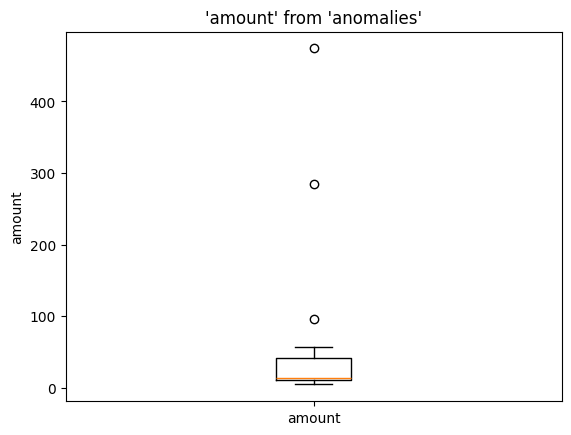

In [23]:
%sqlplot boxplot --table anomalies --column amount

## Explore data via pyiceberg

In [17]:
from pyiceberg.catalog import load_catalog

catalog = load_catalog(
    "rest",
    **{
        "type": "rest",
        "uri": "http://localhost:8181/",
        "warehouse": "file:///tmp/warehouse",
    },
)

In [18]:
table = catalog.load_table("default.raw_events")
print(table.spec())
print(table.inspect.snapshots())

[
  1000: dt: day(5)
]
pyarrow.Table
committed_at: timestamp[ms] not null
snapshot_id: int64 not null
parent_id: int64
operation: string
manifest_list: string not null
summary: map<string, string>
  child 0, entries: struct<key: string not null, value: string> not null
      child 0, key: string not null
      child 1, value: string
----
committed_at: [[2025-09-02 02:22:47.427,2025-09-02 02:24:00.041]]
snapshot_id: [[1169516159707921352,757714982550219609]]
parent_id: [[null,1169516159707921352]]
operation: [["append","append"]]
manifest_list: [["file:///tmp/warehouse/default/raw_events/metadata/snap-1169516159707921352-0-72953288-f8a9-45c0-bcc7-2d51bdefd686.avro","file:///tmp/warehouse/default/raw_events/metadata/snap-757714982550219609-0-f9003552-9e44-40cb-b3b8-7f813b236efe.avro"]]
summary: [[keys:["added-files-size","added-data-files","added-records","changed-partition-count","total-data-files","total-delete-files","total-records","total-files-size","total-position-deletes","total-e

In [19]:
table.schema

<bound method Table.schema of raw_events(
  1: id: required long,
  2: user_id: required long,
  3: amount: required decimal(15, 2),
  4: vendor_id: required long,
  5: event_timestamp: required timestamptz
),
partition by: [dt],
sort order: [],
snapshot: Operation.APPEND: id=757714982550219609, parent_id=1169516159707921352, schema_id=0>